# 11 Hyper-parameter search for Deep Q Learning with Google Colab

#### 👉Deep RL is hard, because (among other things) it's very sensitivity to the hyper-parameters.

#### 👉We tune the hyper-parmeters following a trial&error approach:

![](../images/hparams_search_diagram.svg)

#### 👉However, Hyper-parameter spaces in deep RL problems are HUGE. A brute-force solution that would try all possible combinations of hyper-parameters is not feasible. We need something smarter than that...

#### 👉And this is when Bayesian search methods enther into the picture.

#### 👉In a nutshell, Bayesian search methods use past searches to inform promising avenues.

#### 👉 [Optuna](https://optuna.readthedocs.io/en/stable/index.html) is a Python open-source library that implements Bayesian search methods

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/optuna.png?raw=True" width="400"/>

#### 👉Hyper-paramater search a piece of cake 🍰if you use Optuna.

#### 👉 And if you use a GPU, it is even sweeter

<a href='https://colab.research.google.com/github/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/11_hyperparameter_search_in_google_colab.ipynb'><img src="https://colab.research.google.com/assets/colab-badge.svg" width="300"/></a>

## Setup Python environment  in Google Colab 🐍⚒️

In [1]:
if 'google.colab' in str(get_ipython()):

    !git clone https://github.com/Paulescu/hands-on-rl.git

    # navigate to lesson directory
    %cd /content/hands-on-rl/03_cart_pole

    # install exact package versions
    %pip install -r requirements.txt
    print('Go to Runtime > Restart runtime to make sure python uses the exact packages version we just installed.')

Cloning into 'hands-on-rl'...
remote: Enumerating objects: 814, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 814 (delta 144), reused 149 (delta 105), pack-reused 600 (from 1)
Receiving objects: 100% (814/814), 2.56 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (489/489), done.
/content/hands-on-rl/03_cart_pole
Ignoring appnope: markers 'platform_system == "Darwin" and python_version >= "3.7" and sys_platform == "darwin"' don't match your environment
Ignoring argcomplete: markers 'python_version < "3.8.0" and python_version >= "3.7"' don't match your environment
Ignoring atomicwrites: markers 'python_version >= "3.5" and python_full_version < "3.0.0" and sys_platform == "win32" or sys_platform == "win32" and python_version >= "3.5" and python_full_version >= "3.4.0"' don't match your environment
Ignoring cffi: markers 'implementation_name == "pypy" and python_version >= "3.6"' don't match your environment
Ignorin

In [2]:
if 'google.colab' in str(get_ipython()):
    # add `src' package to the PYTHOPATH, so we can import it, e.g. from src.loops import *
    %cd /content/hands-on-rl/03_cart_pole
    %env PYTHONPATH="."

/content/hands-on-rl/03_cart_pole
env: PYTHONPATH="."


-----

In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [4]:
import gym
env = gym.make('CartPole-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### Start MLflow tracking server on your LOCAL computer

From the command line in your **local computer**:
1. cd into the root directory of this lesson (in my case `/Users/paulabartabajo/src/online-courses/hands-on-rl/03_cart_pole`)

2. Spin up the mlflow tracking server on your local computer:
```bash
$ mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000
```
Note: 💡 if you have another service listening to port 5000, you will get an error. In this case encrease port number by 1 until you hit a free port.


3. Create a secured tunnel with [ngrok](https://ngrok.com/), to expose MLflow server to the Internet
```bash
$ ngrok http 5000
```
and copy the public URL you see on the screen

<img src="../images/ngrok_example.png" width="800"/>

In [5]:
## Paste the public URL generated by ngrok here
NGROK_URL = '<PLACEHOLDER>'

In [7]:
!pip install mlflow

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [8]:
import mlflow

# connect mlflow client to the mlflow server that runs on localhost:5000
MLFLOW_SERVER_URI = NGROK_URL
mlflow.set_tracking_uri(str(MLFLOW_SERVER_URI))

EXPERIMENT_NAME = 'hyperparameter_search_from_colab'
mlflow.set_experiment(EXPERIMENT_NAME)

/usr/local/lib/python3.11/dist-packages/mlflow/gateway/config.py:64: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  @validator("togetherai_api_key", pre=True)
/usr/local/lib/python3.11/dist-packages/mlflow/gateway/config.py:372: PydanticDeprecatedSince20: Pydantic V1 style `@root_validator` validators are deprecated. You should migrate to Pydantic V2 style `@model_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  @root_validator(skip_on_failure=True)
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for c

<Experiment: artifact_location='/content/hands-on-rl/03_cart_pole/<PLACEHOLDER>/352789722437932886', creation_time=1737379710427, experiment_id='352789722437932886', last_update_time=1737379710427, lifecycle_stage='active', name='hyperparameter_search_from_colab', tags={}>

## Create an Optuna study

In [9]:
!pip install optuna

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.7 MB/s eta 0:00:00


In [10]:
import optuna

from src.config import OPTUNA_DB

study = optuna.create_study(
    study_name=EXPERIMENT_NAME,
    direction='maximize',
    load_if_exists=True,
    storage=f'sqlite:///{OPTUNA_DB}'
)

[I 2025-01-20 13:28:58,377] A new study created in RDB with name: hyperparameter_search_from_colab


## Objective function we want to maximize

In [11]:
from src.optimize_hyperparameters import objective

# we define a lambda function because study.optimize()
# expect the objective function to have only 1 input
# (trial), while our objective function hast 2 extra
# inputs I defined to add flexibility to the script
func = lambda trial: objective(trial,
                               force_linear_model=False,
                               n_episodes_to_train=200)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


## Set threshold to terminate hyperparameter search

In [12]:
class CheckHyperparamMeanRewardThreshold:
    def __init__(self, reward_threshold: float):
        self.reward_threshold = reward_threshold

    def __call__(self, study: optuna.study.Study, trial: optuna.trial.FrozenTrial) -> None:
        if trial.value >= self.reward_threshold:
            print((f'Stopping hyperparameter search because trial.value ({trial.value}) '
                   f'hit threshold ({self.reward_threshold})'))
            study.stop()

# Stop hyperparameter search when we hit a perfect mean reward of 500
hyperparam_search_stop_callback = CheckHyperparamMeanRewardThreshold(500.0)

## Let's start the search

In [13]:
study.optimize(func, n_trials=100, callbacks=[hyperparam_search_stop_callback])

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/content/hands-on-rl/03_cart_pole/src/optimize_hyperparameters.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/usr/local/lib/python3.11/dist-packages/optuna/dist

67,586 parameters


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 83%|████████▎ | 166/200 [00:00<00:00, 246.07it/s]/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(

100%|██████████| 200/200 [00:01<00:00, 174.66it/s]


Reward mean: 9.36, std: 0.83
Num steps mean: 9.36, std: 0.83


100%|██████████| 1000/1000 [00:02<00:00, 449.84it/s]
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)
[I 2025-01-20 13:29:31,063] Trial 0 finished with value: 9.374 and parameters: {'learning_rate': 0.0006444997347461185, 'discount_factor': 0.9, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.07078135138545812, 'steps_epsilon_decay': 10000, 'seed': 584786806}. Best is trial 0 with value: 9.374.
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It 

67,586 parameters


100%|██████████| 200/200 [00:00<00:00, 301.41it/s]


Reward mean: 9.55, std: 0.75
Num steps mean: 9.55, std: 0.75


100%|██████████| 1000/1000 [00:02<00:00, 348.37it/s]
[I 2025-01-20 13:29:34,863] Trial 1 finished with value: 9.327 and parameters: {'learning_rate': 1.4169325182362712e-05, 'discount_factor': 0.99, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.13647547230436738, 'steps_epsilon_decay': 100000, 'seed': 162347423}. Best is trial 0 with value: 9.374.


67,586 parameters


100%|██████████| 200/200 [00:48<00:00,  4.16it/s]


Reward mean: 141.77, std: 19.92
Num steps mean: 141.77, std: 19.92


100%|██████████| 1000/1000 [00:35<00:00, 27.93it/s]
[I 2025-01-20 13:30:59,097] Trial 2 finished with value: 143.925 and parameters: {'learning_rate': 0.0004998968624751018, 'discount_factor': 0.9, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07694491754347771, 'steps_epsilon_decay': 10000, 'seed': 465235742}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:00<00:00, 265.28it/s]


Reward mean: 8.93, std: 0.70
Num steps mean: 8.93, std: 0.70


100%|██████████| 1000/1000 [00:02<00:00, 466.70it/s]
[I 2025-01-20 13:31:02,428] Trial 3 finished with value: 9.077 and parameters: {'learning_rate': 4.411773163880151e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 256, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.010824999492614418, 'steps_epsilon_decay': 100000, 'seed': 357580936}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:02<00:00, 84.66it/s]


Reward mean: 10.68, std: 1.31
Num steps mean: 10.68, std: 1.31


100%|██████████| 1000/1000 [00:02<00:00, 422.21it/s]
[I 2025-01-20 13:31:07,414] Trial 4 finished with value: 10.933 and parameters: {'learning_rate': 6.616493556629051e-05, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 128, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07513157362897055, 'steps_epsilon_decay': 1000, 'seed': 217153037}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:00<00:00, 241.30it/s]


Reward mean: 13.23, std: 7.19
Num steps mean: 13.23, std: 7.19


100%|██████████| 1000/1000 [00:03<00:00, 250.27it/s]
[I 2025-01-20 13:31:12,493] Trial 5 finished with value: 13.725 and parameters: {'learning_rate': 0.0004081634385700366, 'discount_factor': 0.95, 'batch_size': 128, 'memory_size': 50000, 'freq_steps_train': 8, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.15112379762845812, 'steps_epsilon_decay': 100000, 'seed': 693784820}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:18<00:00, 10.54it/s]


Reward mean: 129.09, std: 4.80
Num steps mean: 129.09, std: 4.80


100%|██████████| 1000/1000 [00:30<00:00, 33.06it/s]
[I 2025-01-20 13:32:02,056] Trial 6 finished with value: 130.74 and parameters: {'learning_rate': 0.006069910301715778, 'discount_factor': 0.95, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.09736479257045241, 'steps_epsilon_decay': 10000, 'seed': 1070779441}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:01<00:00, 101.24it/s]


Reward mean: 9.27, std: 0.87
Num steps mean: 9.27, std: 0.87


100%|██████████| 1000/1000 [00:03<00:00, 266.97it/s]
[I 2025-01-20 13:32:08,358] Trial 7 finished with value: 9.396 and parameters: {'learning_rate': 0.004615723587787994, 'discount_factor': 0.9, 'batch_size': 16, 'memory_size': 10000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.18890473864387577, 'steps_epsilon_decay': 1000, 'seed': 1049785890}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:04<00:00, 49.53it/s]


Reward mean: 9.27, std: 0.87
Num steps mean: 9.27, std: 0.87


100%|██████████| 1000/1000 [00:02<00:00, 490.21it/s]
[I 2025-01-20 13:32:14,680] Trial 8 finished with value: 9.388 and parameters: {'learning_rate': 1.1326580745111066e-05, 'discount_factor': 0.9, 'batch_size': 128, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.1746556986281238, 'steps_epsilon_decay': 100000, 'seed': 550426544}. Best is trial 2 with value: 143.925.


67,586 parameters


100%|██████████| 200/200 [00:19<00:00, 10.46it/s]


Reward mean: 170.86, std: 6.88
Num steps mean: 170.86, std: 6.88


100%|██████████| 1000/1000 [00:41<00:00, 24.18it/s]
[I 2025-01-20 13:33:15,645] Trial 9 finished with value: 170.043 and parameters: {'learning_rate': 0.002382857426839077, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.19144419842085458, 'steps_epsilon_decay': 100000, 'seed': 604324387}. Best is trial 9 with value: 170.043.


67,586 parameters


100%|██████████| 200/200 [00:01<00:00, 146.94it/s]


Reward mean: 9.71, std: 1.14
Num steps mean: 9.71, std: 1.14


100%|██████████| 1000/1000 [00:02<00:00, 447.19it/s]
[I 2025-01-20 13:33:19,816] Trial 10 finished with value: 9.427 and parameters: {'learning_rate': 0.0016224093760135287, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.015163126971699858, 'steps_epsilon_decay': 100000, 'seed': 823919666}. Best is trial 9 with value: 170.043.


67,586 parameters


100%|██████████| 200/200 [00:34<00:00,  5.84it/s]


Reward mean: 110.94, std: 3.40
Num steps mean: 110.94, std: 3.40


100%|██████████| 1000/1000 [00:26<00:00, 37.44it/s]
[I 2025-01-20 13:34:21,233] Trial 11 finished with value: 111.998 and parameters: {'learning_rate': 0.0016903581460678278, 'discount_factor': 0.9, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.05403568253761487, 'steps_epsilon_decay': 10000, 'seed': 385589331}. Best is trial 9 with value: 170.043.


67,586 parameters


100%|██████████| 200/200 [00:33<00:00,  5.91it/s]


Reward mean: 230.63, std: 61.87
Num steps mean: 230.63, std: 61.87


100%|██████████| 1000/1000 [00:52<00:00, 18.96it/s]
[I 2025-01-20 13:35:48,385] Trial 12 finished with value: 216.026 and parameters: {'learning_rate': 0.000155020223313465, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.11839668540735458, 'steps_epsilon_decay': 10000, 'seed': 797129245}. Best is trial 12 with value: 216.026.


67,586 parameters


100%|██████████| 200/200 [00:57<00:00,  3.46it/s]


Reward mean: 424.00, std: 81.96
Num steps mean: 424.00, std: 81.96


100%|██████████| 1000/1000 [01:45<00:00,  9.46it/s]
[I 2025-01-20 13:38:32,316] Trial 13 finished with value: 432.471 and parameters: {'learning_rate': 0.00011800710425272232, 'discount_factor': 0.99, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.13231010034151633, 'steps_epsilon_decay': 10000, 'seed': 830415453}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [01:02<00:00,  3.20it/s]


Reward mean: 350.89, std: 62.83
Num steps mean: 350.89, std: 62.83


100%|██████████| 1000/1000 [01:24<00:00, 11.88it/s]
[I 2025-01-20 13:40:59,444] Trial 14 finished with value: 344.464 and parameters: {'learning_rate': 0.00013251795682676462, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.12547384297736258, 'steps_epsilon_decay': 10000, 'seed': 826400469}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [00:02<00:00, 80.14it/s]


Reward mean: 9.26, std: 0.86
Num steps mean: 9.26, std: 0.86


100%|██████████| 1000/1000 [00:02<00:00, 448.22it/s]
[I 2025-01-20 13:41:04,753] Trial 15 finished with value: 9.388 and parameters: {'learning_rate': 0.00010897689430916104, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 100000, 'freq_steps_train': 256, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.14723114336560228, 'steps_epsilon_decay': 10000, 'seed': 840399793}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [00:26<00:00,  7.56it/s]


Reward mean: 126.74, std: 36.74
Num steps mean: 126.74, std: 36.74


100%|██████████| 1000/1000 [00:31<00:00, 32.02it/s]
[I 2025-01-20 13:42:02,895] Trial 16 finished with value: 126.519 and parameters: {'learning_rate': 3.3761468038813236e-05, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.11195032673371154, 'steps_epsilon_decay': 10000, 'seed': 909288517}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [01:23<00:00,  2.39it/s]


Reward mean: 410.92, std: 114.32
Num steps mean: 410.92, std: 114.32


100%|██████████| 1000/1000 [01:34<00:00, 10.61it/s]
[I 2025-01-20 13:45:01,162] Trial 17 finished with value: 387.904 and parameters: {'learning_rate': 0.0002180020502489894, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.16032248093931326, 'steps_epsilon_decay': 10000, 'seed': 698319281}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [00:00<00:00, 210.69it/s]


Reward mean: 11.01, std: 2.38
Num steps mean: 11.01, std: 2.38


100%|██████████| 1000/1000 [00:03<00:00, 289.40it/s]
[I 2025-01-20 13:45:06,040] Trial 18 finished with value: 11.568 and parameters: {'learning_rate': 0.0001723756952128716, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 10000, 'freq_steps_train': 16, 'freq_steps_update_target': 1000, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.16132169938592647, 'steps_epsilon_decay': 1000, 'seed': 696445118}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [00:00<00:00, 211.27it/s]


Reward mean: 9.55, std: 0.75
Num steps mean: 9.55, std: 0.75


100%|██████████| 1000/1000 [00:02<00:00, 443.91it/s]
[I 2025-01-20 13:45:09,908] Trial 19 finished with value: 9.327 and parameters: {'learning_rate': 0.0009387315476983805, 'discount_factor': 0.99, 'batch_size': 16, 'memory_size': 100000, 'freq_steps_train': 256, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.16769537512266436, 'steps_epsilon_decay': 10000, 'seed': 955163222}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [00:50<00:00,  3.99it/s]


Reward mean: 206.82, std: 134.39
Num steps mean: 206.82, std: 134.39


100%|██████████| 1000/1000 [00:46<00:00, 21.64it/s]
[I 2025-01-20 13:46:46,725] Trial 20 finished with value: 187.374 and parameters: {'learning_rate': 0.00030226725885652237, 'discount_factor': 0.95, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.09789178331941861, 'steps_epsilon_decay': 10000, 'seed': 707335026}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [01:48<00:00,  1.85it/s]


Reward mean: 346.46, std: 130.12
Num steps mean: 346.46, std: 130.12


100%|██████████| 1000/1000 [01:33<00:00, 10.71it/s]
[I 2025-01-20 13:50:08,637] Trial 21 finished with value: 370.89 and parameters: {'learning_rate': 0.00025325648016681006, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.12574044930473754, 'steps_epsilon_decay': 10000, 'seed': 937948043}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [01:19<00:00,  2.52it/s]


Reward mean: 118.83, std: 3.50
Num steps mean: 118.83, std: 3.50


100%|██████████| 1000/1000 [00:29<00:00, 33.36it/s]
[I 2025-01-20 13:51:58,499] Trial 22 finished with value: 118.195 and parameters: {'learning_rate': 0.0002698846348147393, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.14777454313800956, 'steps_epsilon_decay': 10000, 'seed': 958225581}. Best is trial 13 with value: 432.471.


67,586 parameters


100%|██████████| 200/200 [02:04<00:00,  1.60it/s]


Reward mean: 500.00, std: 0.00
Num steps mean: 500.00, std: 0.00


100%|██████████| 1000/1000 [02:04<00:00,  8.03it/s]
[I 2025-01-20 13:56:08,461] Trial 23 finished with value: 500.0 and parameters: {'learning_rate': 6.934001363754801e-05, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.121834251484471, 'steps_epsilon_decay': 10000, 'seed': 681564363}. Best is trial 23 with value: 500.0.


Stopping hyperparameter search because trial.value (500.0) hit threshold (500.0)


## These are the best hyper-parameters

In [15]:
best_trial = study.best_trial

hparams = {k: best_trial.params[k] for k in best_trial.params if k != 'seed'}
#hparams['nn_hidden_layers'] = eval(hparams['nn_hidden_layers'])
print(hparams)

SEED = best_trial.params['seed']
print('Seed: ', SEED)

{'learning_rate': 6.934001363754801e-05, 'discount_factor': 0.99, 'batch_size': 64, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 100, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 1, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.121834251484471, 'steps_epsilon_decay': 10000}
Seed:  681564363


## We can re-run the training to get the perfect agent

In [16]:
from src.utils import set_seed
set_seed(env, SEED)

from src.q_agent import QAgent
agent = QAgent(env, **hparams)

from src.loops import train
train(agent, env, n_episodes=100)

67,586 parameters


100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


## or simply load the `agent_id` from the best run

In [23]:
from src.q_agent import QAgent
from src.config import SAVED_AGENTS_DIR

# you can find the agent_id for the best run in the MLflow
# dashboard.
# 298 is the value in my case, but you need to check what is your
agent_id = 0

path_to_saved_model = SAVED_AGENTS_DIR / 'CartPole-v1' / str(agent_id)
agent = QAgent.load_from_disk(env, path_to_saved_model)

10 parameters


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/content/hands-on-rl/03_cart_pole/src/q_agent.py:350: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are expli

## Evaluate the agent ⏱️

In [24]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
100%|██████████| 1000/1000 [00:15<00:00, 65.81it/s]


In [25]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 160.07, std 7.02


## Let's see how far we got in each attempt

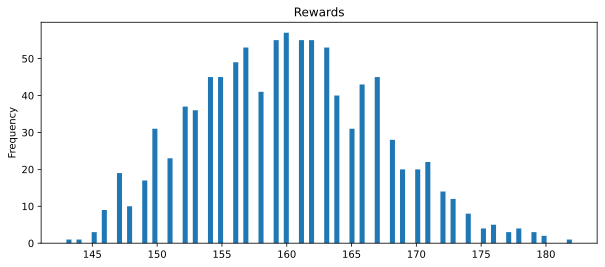

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

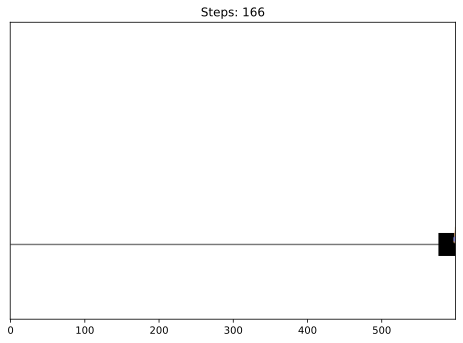

In [28]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=123)